In [416]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [417]:
df= pd.read_csv('penguins.csv')

In [418]:
df.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


In [419]:
df.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

In [420]:
X=df.drop(['Species'],axis=1).copy()
y=df['Species'].copy()

In [421]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y)

In [422]:
used_features=['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']

In [423]:
used_features

['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']

In [424]:
#metryki
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score'])
def show_stats(model_name,model_predictions):
    cm=confusion_matrix(y_test,model_predictions)
    ax=sns.heatmap(cm,annot=True,fmt='.0f')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    plt.show()
    
    print(model_name.upper(),'\n\n')
    print(classification_report(y_test, model_predictions))
    
    global metrics_dataframe
    f1_metric =f1_score(y_test,model_predictions,average='weighted')
    metrics_dataframe=metrics_dataframe._append({'Model':model_name,'F1_score':f1_metric},ignore_index=True)
    
    display( metrics_dataframe.sort_values(by='F1_score',ascending=False))

In [425]:
num_prep=Pipeline(steps=[('imput_missing',SimpleImputer(strategy='mean')),
                        ('standardization',StandardScaler())])

In [426]:
model_v1=Pipeline(steps=[('preprocessing',num_prep),('classifier',LogisticRegression())])

In [427]:
model_v1.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('imput_missing', SimpleImputer()),
                                 ('standardization', StandardScaler())])),
                ('classifier', LogisticRegression())])

In [428]:
predictions_1=model_v1.predict(X_test)

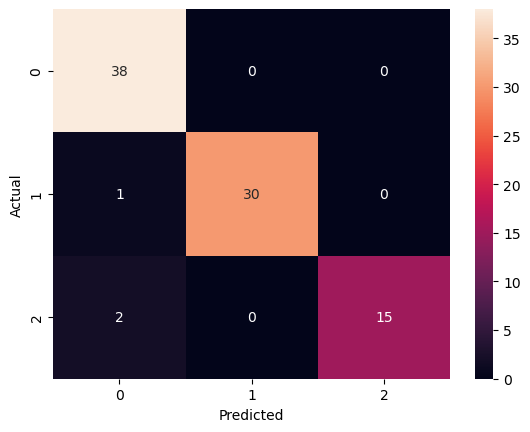

LOGISTIC REGRESSION WITH PIPELINE 


              precision    recall  f1-score   support

           0       0.93      1.00      0.96        38
           1       1.00      0.97      0.98        31
           2       1.00      0.88      0.94        17

    accuracy                           0.97        86
   macro avg       0.98      0.95      0.96        86
weighted avg       0.97      0.97      0.96        86



,Model,F1_score
0,Logistic Regression with pipeline,0.964957


In [429]:
show_stats('Logistic Regression with pipeline',predictions_1)

In [430]:
X_test_2=X_test.copy()

In [431]:
columns=list(X_test_2.columns)

In [432]:
X_test_2[columns]=X_test_2[columns].fillna(X_test_2[columns].mean())

In [433]:
X_test_2.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
dtype: int64

In [434]:
X_test_2_scaled=StandardScaler().fit_transform(X_test_2)

In [435]:
# importowanie poprzedniego modelu i porównanie do aktualnego

In [436]:
import joblib
lr_no_pipeline=joblib.load('lr_no_pipeline.pkl') 

In [437]:
lr_no_pipeline.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=0.1, penalty='l1', solver='liblinear')>

In [438]:
predictions_2=lr_no_pipeline.predict(X_test_2_scaled)

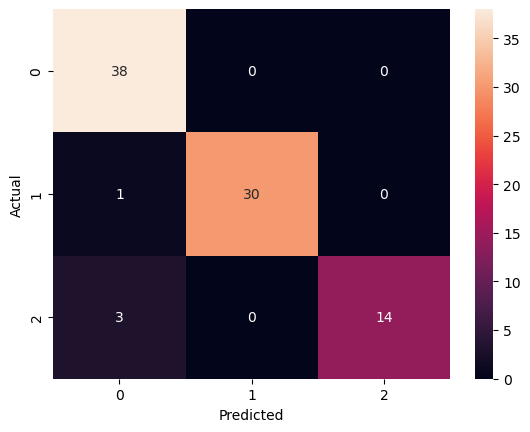

LINEAR REGRESSION WITHOUT PIPELINE 


              precision    recall  f1-score   support

           0       0.90      1.00      0.95        38
           1       1.00      0.97      0.98        31
           2       1.00      0.82      0.90        17

    accuracy                           0.95        86
   macro avg       0.97      0.93      0.95        86
weighted avg       0.96      0.95      0.95        86



,Model,F1_score
0,Logistic Regression with pipeline,0.964957
1,Linear Regression without pipeline,0.952868


In [439]:
show_stats('Linear Regression without pipeline',predictions_2)